In [1]:
cd ../

/Users/creator/Projects/CS6241


In [2]:
from fairrecs.preprocessor import preprocess_yow
from fairrecs.solver import Solver
from fairrecs.dp_solver import DPSolver
from fairrecs.dt_solver import DTSolver
from fairrecs.di_solver import DISolver
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns
import pandas as pd

In [3]:
movies = pd.read_csv("datasets/movies.csv", delimiter="::", names=["MovieID", "Title", "Genres"], header=None)
movies.set_index("MovieID")
movies.head()

/Users/creator/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv("datasets/ratings.csv", delimiter="::", names=["UserID","MovieID","Rating","Timestamp"], header=None)
ratings.set_index("UserID")
ratings.head()

/Users/creator/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users = pd.read_csv("datasets/users.csv", delimiter="::", names=["UserID","Gender","Age","Occupation","Zip-code"], header=None)
users.set_index("UserID")
users.head()

/Users/creator/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
len(ratings)

1000209

In [7]:
users[users['UserID'] == 4169]

,UserID,Gender,Age,Occupation,Zip-code
4168,4169,M,50,0,66048


In [8]:
ratings['UserID'].value_counts()

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
761       20
1493      20
5533      20
2714      20
2696      20
Name: UserID, Length: 6040, dtype: int64

In [9]:
usrrs = ratings.loc[ratings['UserID'] == 4169]

In [10]:
usrrs.set_index('MovieID', inplace=True)
movies.set_index('MovieID', inplace=True)

In [11]:
joined_urm = pd.merge(usrrs, movies, left_index=True, right_index=True, how='inner')
joined_urm.head()

,UserID,Rating,Timestamp,Title,Genres
MovieID,,,,,
3789,4169,5,965333672,"Pawnbroker, The (1965)",Drama
571,4169,4,973310265,"Wedding Gift, The (1994)",Drama
574,4169,3,975805232,Spanking the Monkey (1994),Comedy|Drama
575,4169,3,976589949,"Little Rascals, The (1994)",Children's|Comedy
577,4169,3,988324145,Andre (1994),Adventure|Children's


In [12]:
joined_urm.Genres.value_counts()

Drama                                   523
Comedy                                  264
Drama|Romance                            99
Comedy|Drama                             98
Comedy|Romance                           80
                                       ... 
Sci-Fi|War                                1
Action|Drama|Sci-Fi|Thriller              1
Action|Adventure|Sci-Fi|Thriller|War      1
Crime|Film-Noir|Mystery                   1
Action|Comedy|Musical                     1
Name: Genres, Length: 261, dtype: int64

In [13]:
pd.set_option('display.max_rows', None)
allcomedies = joined_urm[joined_urm['Genres'].str.contains('Action')]
comedies = allcomedies[~allcomedies['Genres'].str.contains('Drama')]
alldramas = joined_urm[joined_urm['Genres'].str.contains('Drama')]
dramas = alldramas[~alldramas['Genres'].str.contains('Action')]

In [14]:
comedies['Rating'].value_counts().sort_index(axis=0)

1     11
2     48
3    106
4     81
5     15
Name: Rating, dtype: int64

In [15]:
comedies.shape

(261, 5)

In [16]:
dramas.shape

(1000, 5)

In [17]:
dramas_ratings_count = np.hstack([np.arange(1, 6).reshape(-1,1), dramas['Rating'].value_counts().sort_index(axis=0).to_numpy().reshape(-1,1)])
comedies_ratings_count = np.hstack([np.arange(1, 6).reshape(-1,1), comedies['Rating'].value_counts().sort_index(axis=0).to_numpy().reshape(-1,1)])

In [18]:
drama_avg = np.average(dramas_ratings_count[:,0], weights=dramas_ratings_count[:,1])
drama_var = np.average((dramas_ratings_count[:,0] - drama_avg)**2, weights=dramas_ratings_count[:,1])
print("Drama mean: ", drama_avg)
print("Drama var: ", drama_var)

Drama mean:  3.799
Drama var:  0.946599


In [19]:
comedy_avg = np.average(comedies_ratings_count[:,0], weights=comedies_ratings_count[:,1])
comedy_var = np.average((comedies_ratings_count[:,0] - comedy_avg)**2, weights=comedies_ratings_count[:,1])
print("Comedy mean: ", comedy_avg)
print("Comedy var: ", comedy_var)

Comedy mean:  3.157088122605364
Comedy var:  0.868043628249732


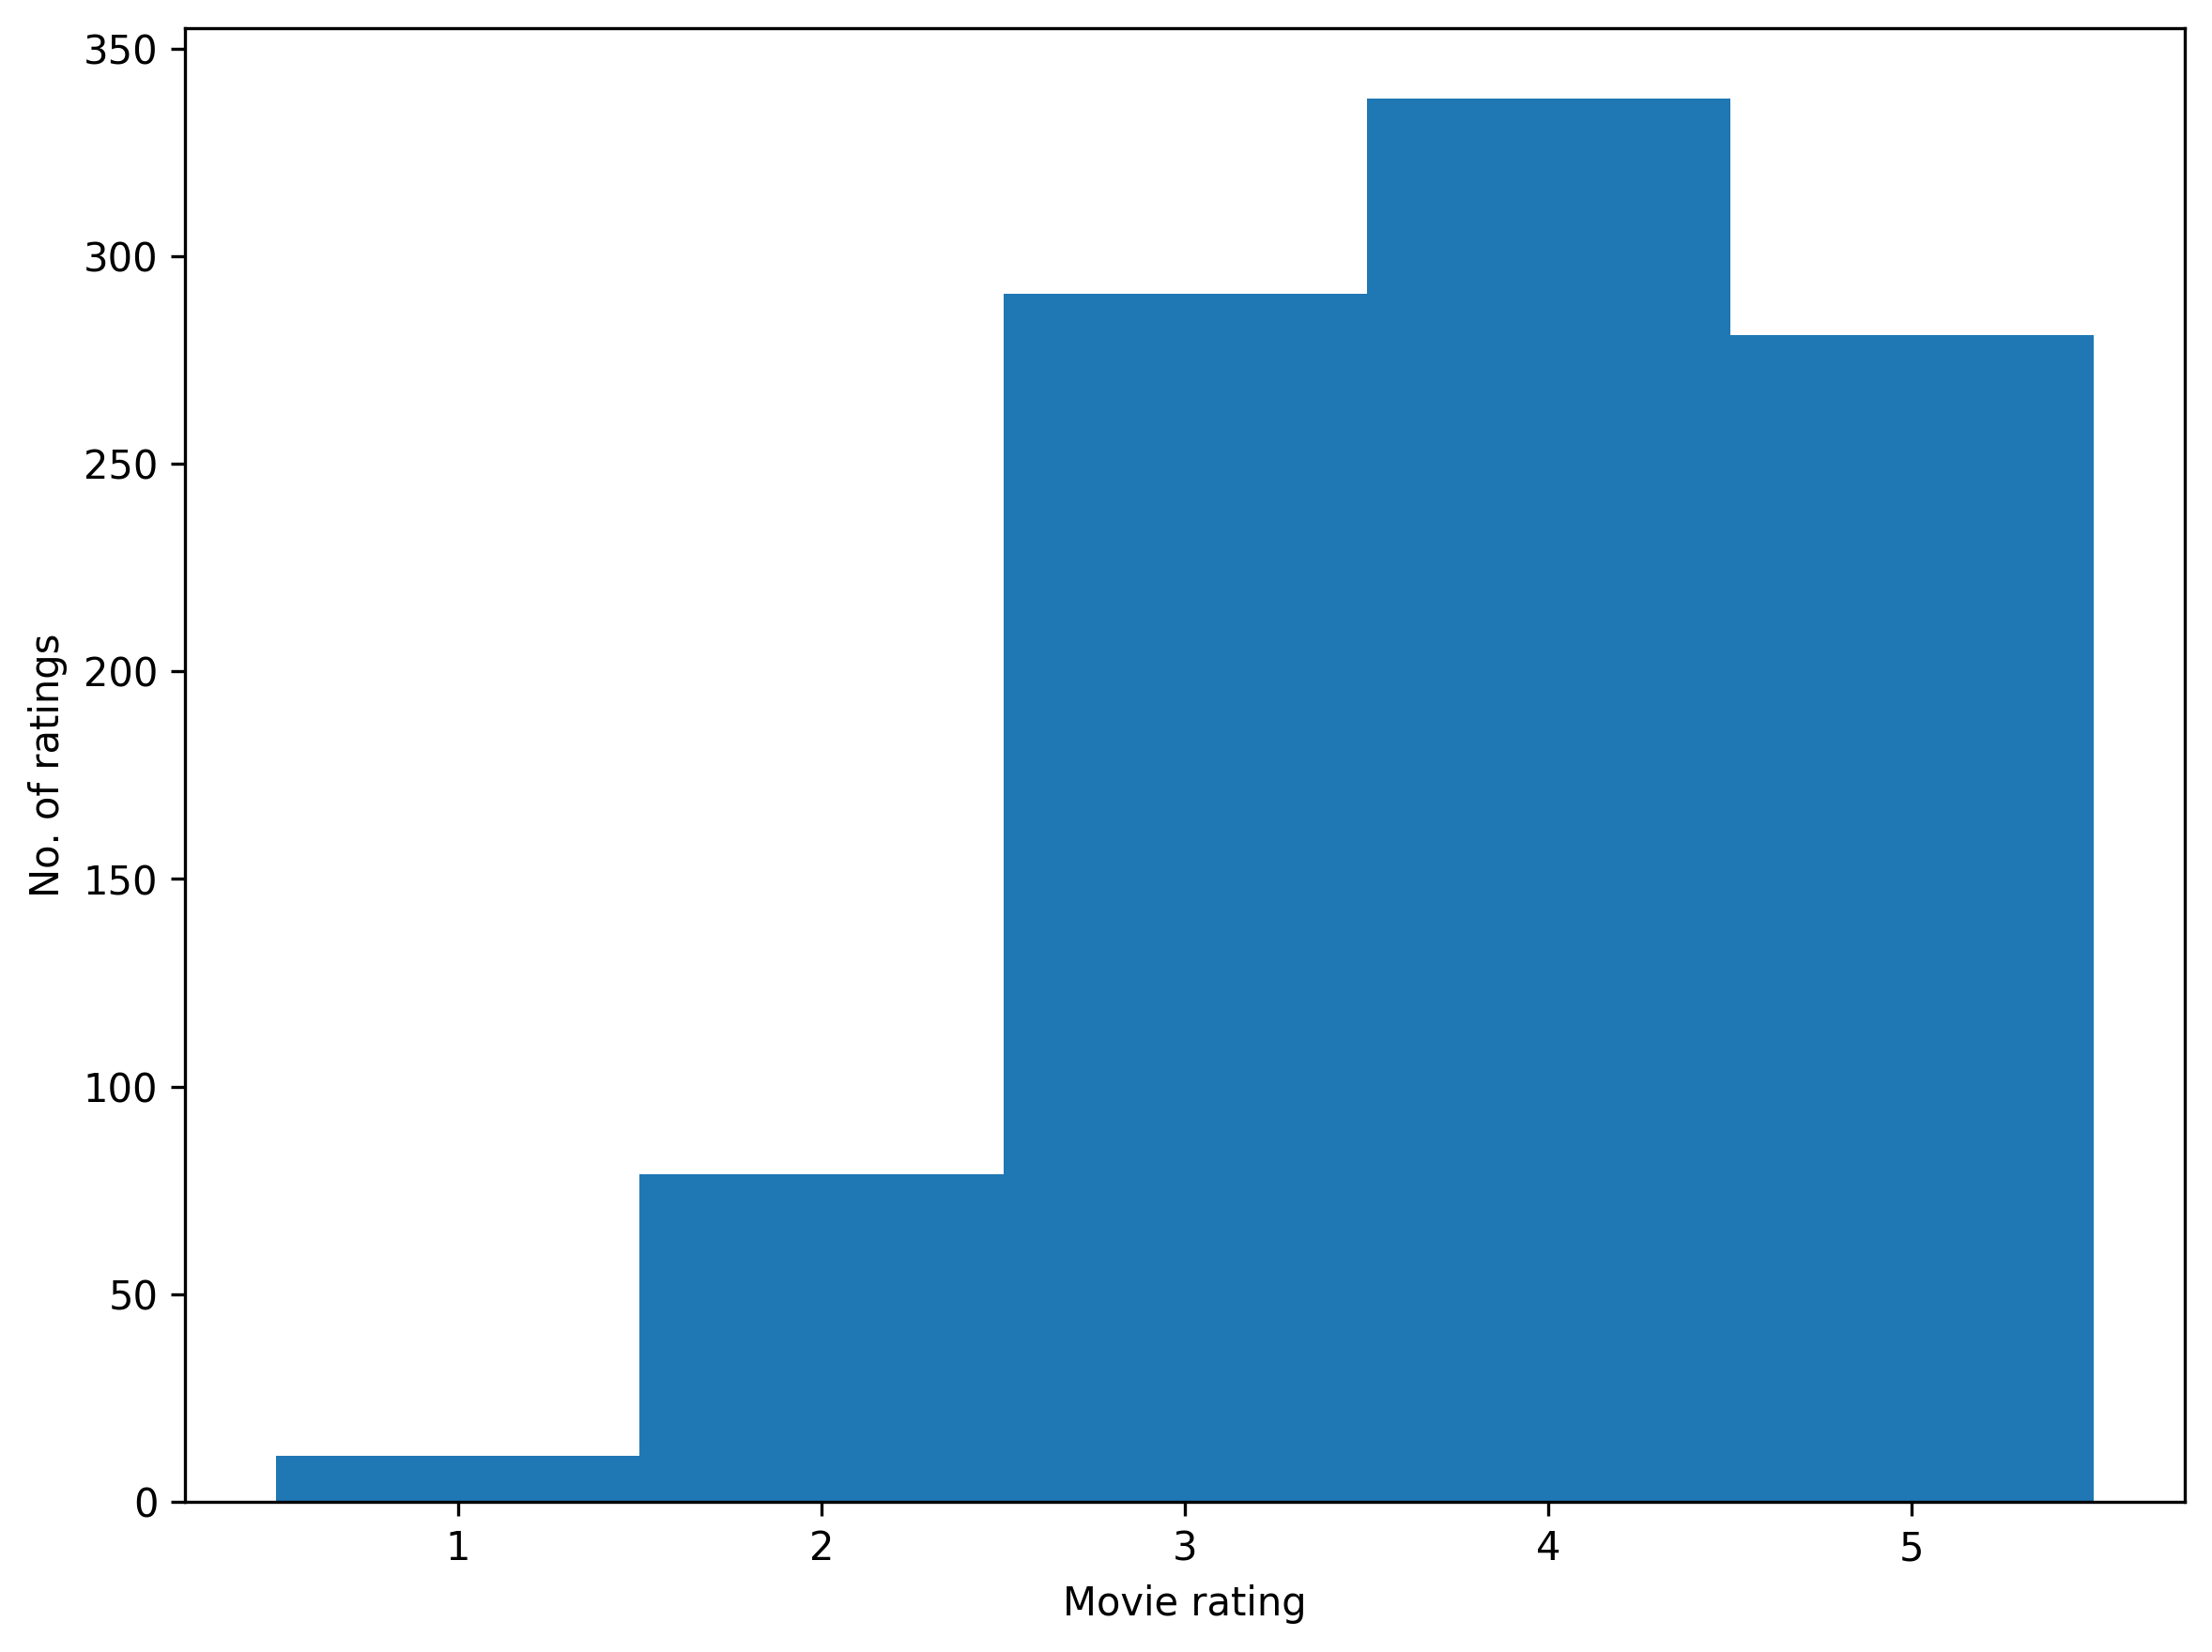

In [20]:
x = dramas_ratings_count[:,0]
y = dramas_ratings_count[:,1]
plt.figure(num=None, figsize=(8, 6), dpi=300)
plt.xlabel('Movie rating')
plt.ylabel('No. of ratings')
plt.tight_layout(True)
plt.hist(x, bins=(np.arange(1,7)-0.5), weights=y)
plt.show()

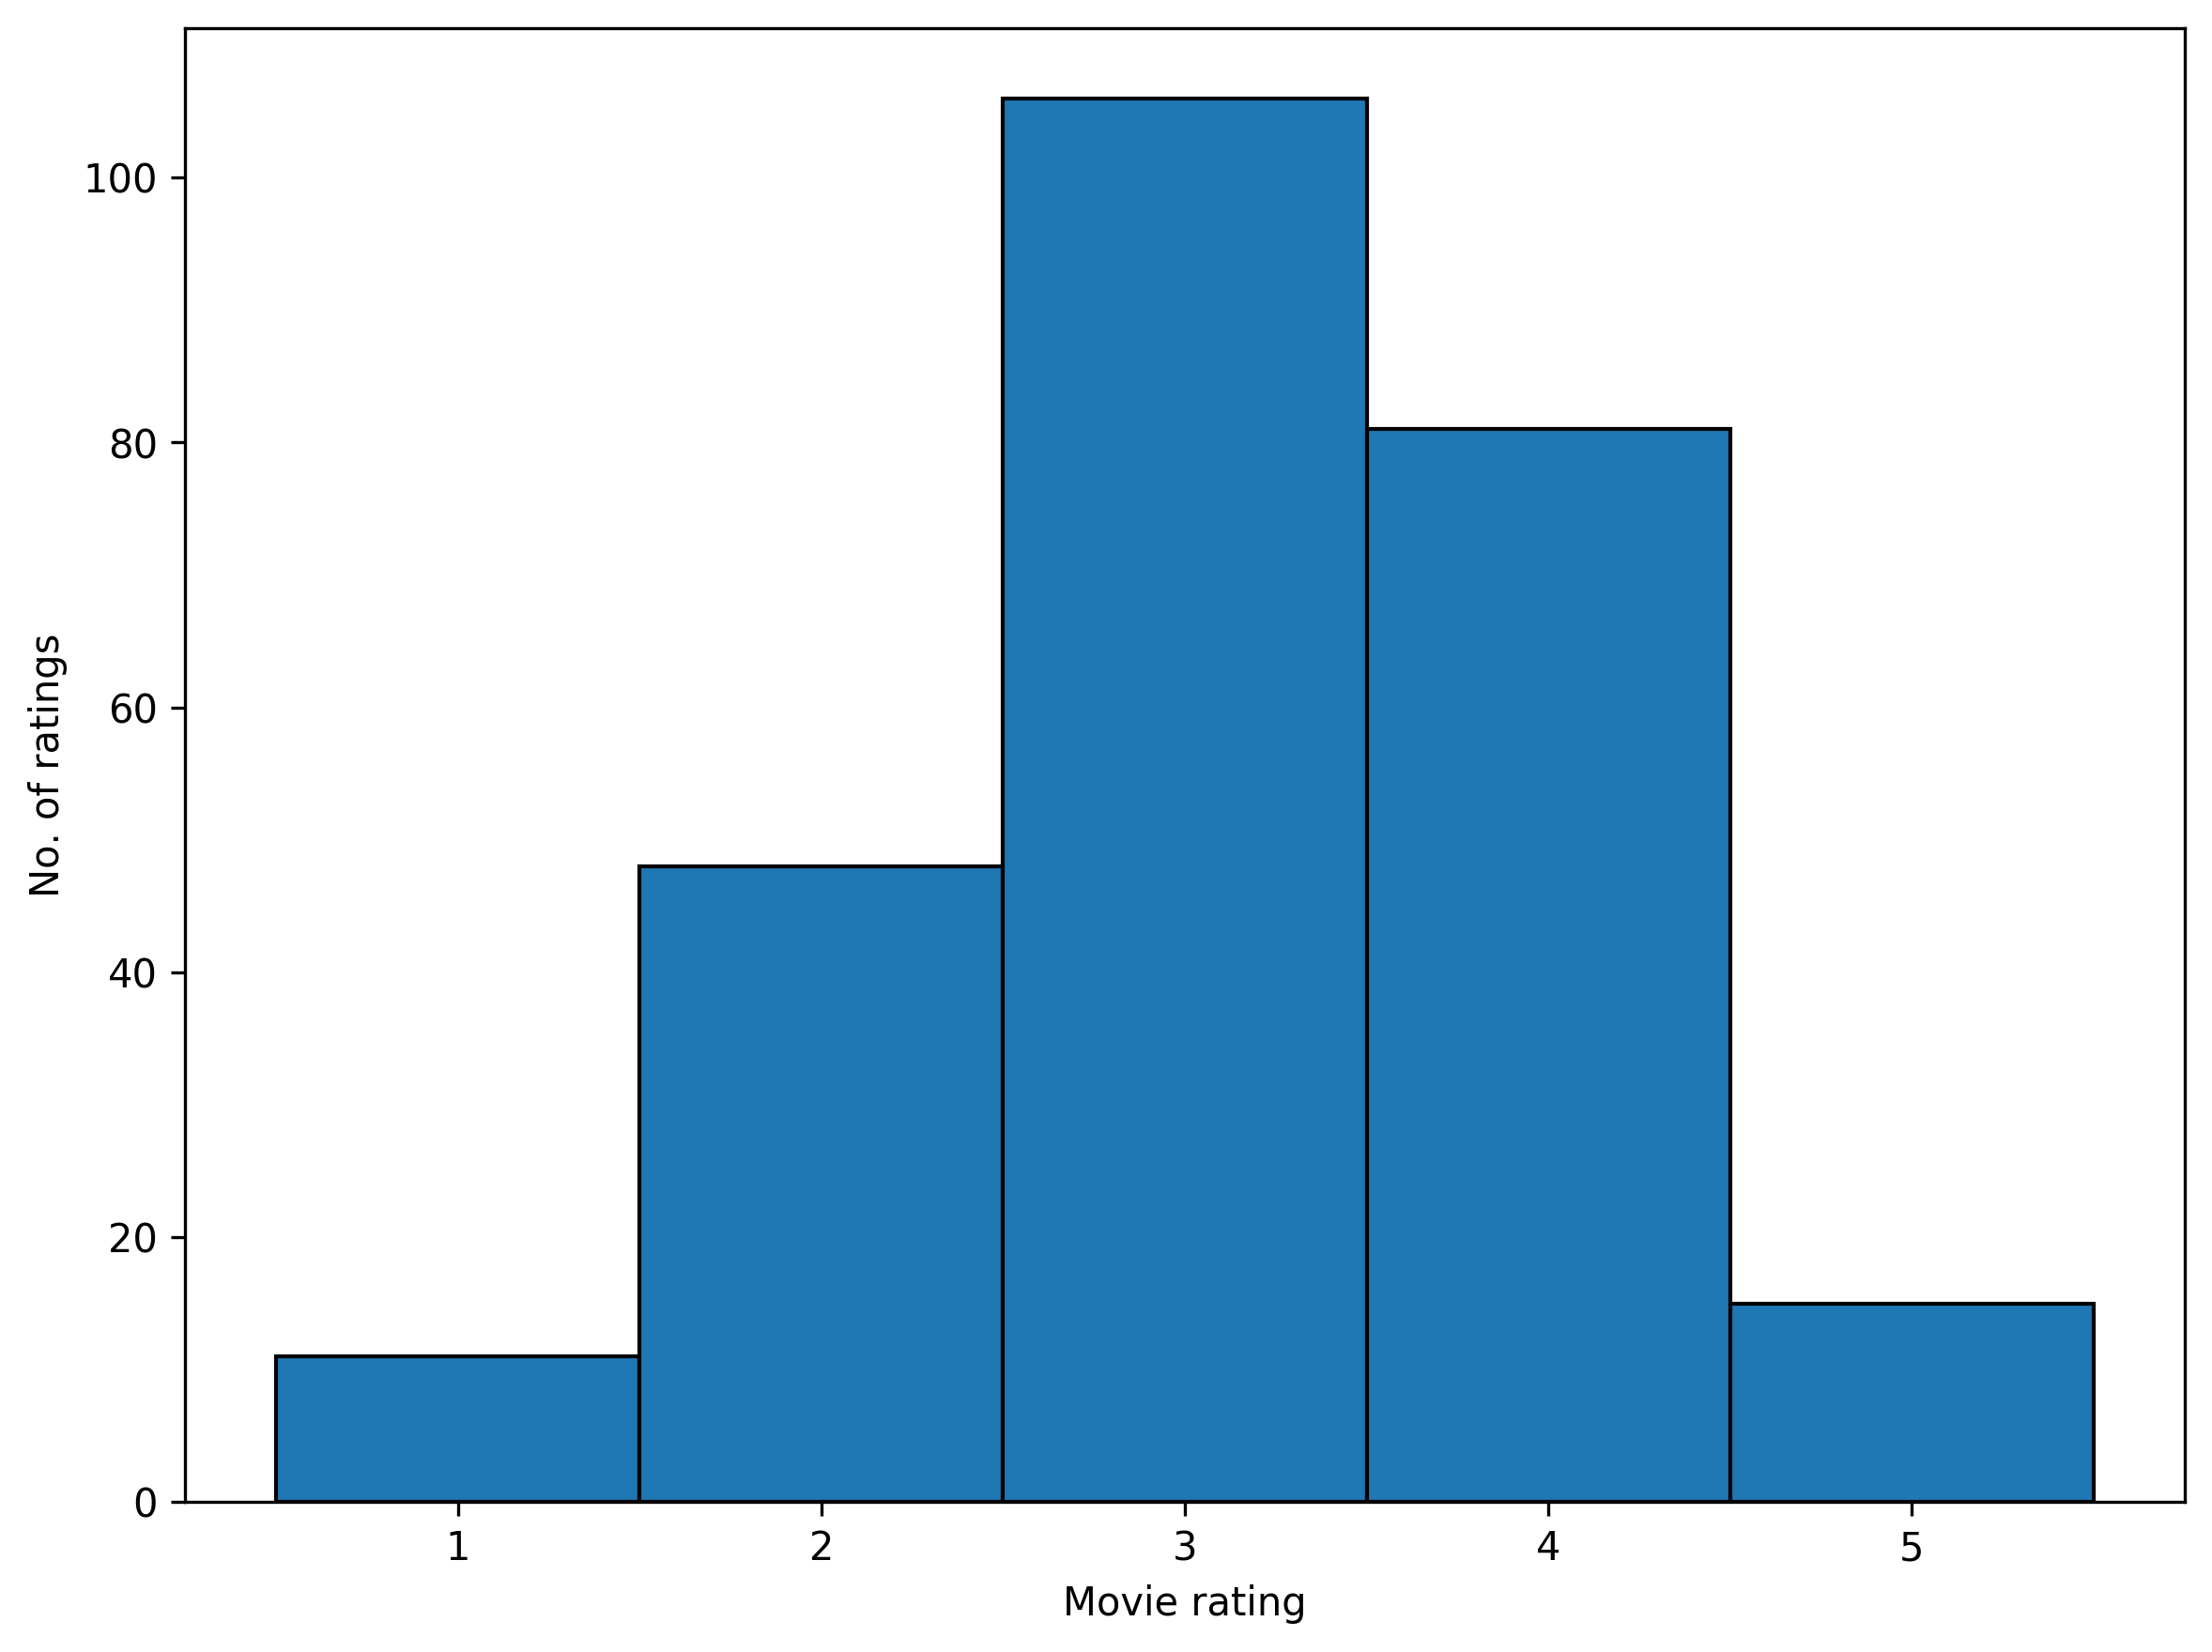

In [21]:
x = comedies_ratings_count[:,0]
y = comedies_ratings_count[:,1]
plt.figure(num=None, figsize=(8, 6), dpi=300)
plt.xlabel('Movie rating')
plt.ylabel('No. of ratings')
plt.tight_layout(True)
plt.hist(x, bins=(np.arange(1,7)-0.5), weights=y, edgecolor='black')
plt.show()

In [22]:
comedies

,UserID,Rating,Timestamp,Title,Genres
MovieID,,,,,
3793,4169,3,965333752,X-Men (2000),Action|Sci-Fi
2058,4169,4,975804539,"Negotiator, The (1998)",Action|Thriller
589,4169,4,973310236,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
6,4169,4,973310869,Heat (1995),Action|Crime|Thriller
1408,4169,5,973310425,"Last of the Mohicans, The (1992)",Action|Romance|War
2402,4169,1,971581494,Rambo: First Blood Part II (1985),Action|War
2403,4169,1,971581266,First Blood (1982),Action
2404,4169,1,971581597,Rambo III (1988),Action|War
2405,4169,3,971581184,"Jewel of the Nile, The (1985)",Action|Adventure|Comedy|Romance


In [23]:
k_comedies = 20
k_dramas = 20
r_comedies = np.random.choice(comedies.shape[0], k_comedies, replace=False)
r_dramas = np.random.choice(dramas.shape[0], k_dramas, replace=False)
X = np.hstack([comedies['Rating'].to_numpy(), dramas['Rating'].to_numpy()])
G = np.hstack([np.zeros(len(comedies['Rating'].to_numpy())), np.ones(len(dramas['Rating'].to_numpy()))])
print("# of ratings: ", X.shape, " # of groups: ", G.shape)

# of ratings:  (1261,)  # of groups:  (1261,)


In [24]:
np.where(G == np.unique(G)[0])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [25]:
import numpy as np
from fairrecs.preprocessor import preprocess_yow
from fairrecs.utils.cof import cost_of_fairness as cof
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns

# Configuration
sns.set_palette('colorblind')

In [26]:
X

array([3, 4, 4, ..., 4, 5, 3])

In [29]:
u = X
v = np.array([1.0 / (np.log(2 + i)) for i, _ in enumerate(u)])
#v[range(10,len(v))] = 0

solver = slv.Solver(u)
P = solver.solve()

solver_dp = dpslv.DPSolver(u, G)
P_dp = solver_dp.solve()

solver_dt = dtslv.DTSolver(u, G)
P_dt = solver_dt.solve()

solver_di = dislv.DISolver(u, G)
P_di = solver_di.solve()


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -7.872e+02  -4.288e+06  +4e+06  7e-03  5e-10  1e+00  1e+00    ---    ---    1  2  - |  -  - 
 1  -7.898e+02  -1.387e+05  +1e+05  2e-04  1e-11  5e-02  4e-02  0.9890  2e-02   1  1  1 |  0  0
 2  -7.906e+02  -1.003e+04  +1e+04  2e-05  4e-12  3e-03  3e-03  0.9320  1e-04   0  1  1 |  0  0
 3  -7.965e+02  -1.957e+03  +1e+03  2e-06  6e-12  4e-04  4e-04  0.9890  1e-01   1  1  1 |  0  0
 4  -8.017e+02  -1.013e+03  +2e+02  3e-07  9e-12  7e-05  7e-05  0.8310  2e-02   1  1  1 |  0  0
 5  -8.129e+02  -8.559e+02  +4e+01  7e-08  3e-11  1e-05  1e-05  0.9009  1e-01   1  1  1 |  0  0
 6  -8.180e+02  -8.439e+02  +3e+01  4e-08  5e-11  8e-06  8e-06  0.7885  5e-01   1  1  1 |  0  0
 7  -8.212e+02  -8.277e+02  +7e+00  1e-08  4e-11  2e-06  2e-06  0.7801  4e-02   1  1  1 |  0  0
 8  -8.226e+02  -8.241e+02  +2e+00  2e-09  4e-

16  -8.230e+02  -8.230e+02  +4e-03  6e-12  6e-12  1e-09  1e-09  0.9890  1e-01   3  1  1 |  0  0
17  -8.230e+02  -8.230e+02  +1e-04  2e-13  8e-13  3e-11  4e-11  0.9792  5e-03   5  2  2 |  0  0
18  -8.230e+02  -8.230e+02  +1e-06  3e-14  4e-14  4e-13  4e-13  0.9890  1e-04   2  2  2 |  0  0

OPTIMAL (within feastol=4.4e-14, reltol=1.5e-09, abstol=1.2e-06).
Runtime: 157.785191 seconds.



In [30]:
print("Expected utility: ", solver.expected_utility())
print("Demographic parity expected utility: ", solver_dp.expected_utility())
print("Demographic parity cost of fairness: ", cof(u, P, P_dp, v))
print("Disparate treatment expected utility: ", solver_dt.expected_utility())
print("Disparate treatment cost of fairness: ", cof(u, P, P_dt, v))
print("Disparate impact expected utility: ", solver_di.expected_utility())
print("Disparate impact cost of fairness: ", cof(u, P, P_di, v))

Expected utility:  823.027468206568
Demographic parity expected utility:  823.027467763
Demographic parity cost of fairness:  4.4356776060943377e-07
Disparate treatment expected utility:  822.7052794637256
Disparate treatment cost of fairness:  0.3221887428423242
Disparate impact expected utility:  823.0274685063634
Disparate impact cost of fairness:  -2.997953390277757e-07


Expected utility:  188.50941500288255

Demographic parity expected utility:  188.54527223517752

Demographic parity cost of fairness:  -0.0358572322949758

Disparate treatment expected utility:  188.48251922817286

Disparate treatment cost of fairness:  0.026895774709631882

Disparate impact expected utility:  188.47801601205924

Disparate impact cost of fairness:  0.031398990823244675

In [172]:
solver_dpa = DPSolver(u, G)
solver_dta = DTSolver(u, G)
solver_dia = DISolver(u, G)

In [31]:
u = X
v = np.array([1.0 / (np.log(2 + i)) for i, _ in enumerate(u)])

solver_dpa = dpslv.DPSolver(u, G)
solver_dta = dtslv.DTSolver(u, G)
solver_dia = dislv.DISolver(u, G)

solver = Solver(u)
P = solver.solve()


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -7.872e+02  -4.288e+06  +4e+06  7e-03  5e-10  1e+00  1e+00    ---    ---    1  2  - |  -  - 
 1  -7.898e+02  -1.387e+05  +1e+05  2e-04  1e-11  5e-02  4e-02  0.9890  2e-02   1  1  1 |  0  0
 2  -7.906e+02  -1.003e+04  +1e+04  2e-05  4e-12  3e-03  3e-03  0.9320  1e-04   0  1  1 |  0  0
 3  -7.965e+02  -1.957e+03  +1e+03  2e-06  6e-12  4e-04  4e-04  0.9890  1e-01   1  1  1 |  0  0
 4  -8.017e+02  -1.013e+03  +2e+02  3e-07  9e-12  7e-05  7e-05  0.8310  2e-02   1  1  1 |  0  0
 5  -8.129e+02  -8.559e+02  +4e+01  7e-08  3e-11  1e-05  1e-05  0.9009  1e-01   1  1  1 |  0  0
 6  -8.180e+02  -8.439e+02  +3e+01  4e-08  5e-11  8e-06  8e-06  0.7885  5e-01   1  1  1 |  0  0
 7  -8.212e+02  -8.277e+02  +7e+00  1e-08  4e-11  2e-06  2e-06  0.7801  4e-02   1  1  1 |  0  0
 8  -8.226e+02  -8.241e+02  +2e+00  2e-09  4e-

In [32]:
count = 10
J = 1 - np.logspace(3,1,count)/2000
Y = np.zeros([count, 3])
C = np.zeros([count, 3])
for i, alpha in enumerate(J):
    if i % 3 == 1:
        print("Round ", i)
    solver_dpa.alpha = alpha
    solver_dta.alpha = alpha
    solver_dia.alpha = alpha
    P_dpa = solver_dpa.solve()
    P_dta = solver_dta.solve()
    P_dia = solver_dia.solve()
    Y[i, 0] = solver_dpa.expected_utility()
    Y[i, 1] = solver_dta.expected_utility()
    Y[i, 2] = solver_dia.expected_utility()
    C[i, 0] = cof(u, P, P_dpa, v)
    C[i, 1] = cof(u, P, P_dta, v)
    C[i, 2] = cof(u, P, P_dia, v)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -7.809e+02  -4.422e+06  +1e+07  4e-01  1e-02  1e+00  4e+00    ---    ---    3  3  - |  -  - 
 1  -1.207e+03  -1.088e+06  +5e+06  1e-01  4e-03  1e+00  2e+00  0.8236  2e-01   2  2  2 |  0  0
 2  -8.716e+02  -1.980e+05  +1e+06  2e-02  7e-04  3e-01  3e-01  0.8274  5e-02   3  2  2 |  0  0
 3  -8.590e+02  -1.599e+05  +9e+05  2e-02  5e-04  2e-01  3e-01  0.2591  3e-01   2  2  1 |  0  0
 4  -8.530e+02  -1.612e+05  +9e+05  2e-02  5e-04  2e-01  3e-01  0.0696  9e-01   2  2  2 |  0  0
 5  -8.348e+02  -1.158e+05  +6e+05  1e-02  4e-04  2e-01  2e-01  0.3448  2e-01   2  2  2 |  0  0
 6  -8.425e+02  -1.135e+05  +6e+05  1e-02  3e-04  1e-01  2e-01  0.3211  8e-01   3  2  2 |  0  0
 7  -8.028e+02  -2.548e+04  +1e+05  3e-03  8e-05  2e-02  4e-02  0.9034  1e-01   2  2  1 |  0  0
 8  -7.937e+02  -2.572e+03  +1e+04  2e-04  7e-

10  -8.229e+02  -8.232e+02  +3e-01  5e-10  3e-09  1e-07  1e-07  0.5667  6e-02   2  1  1 |  0  0
11  -8.230e+02  -8.231e+02  +2e-01  3e-10  1e-09  5e-08  6e-08  0.4964  8e-02   2  1  1 |  0  0
12  -8.230e+02  -8.231e+02  +1e-01  1e-10  8e-10  3e-08  3e-08  0.4754  1e-01   2  1  1 |  0  0
13  -8.230e+02  -8.231e+02  +5e-02  8e-11  4e-10  2e-08  2e-08  0.5199  9e-02   2  1  1 |  0  0
14  -8.230e+02  -8.230e+02  +3e-02  4e-11  2e-10  8e-09  8e-09  0.5961  1e-01   2  1  1 |  0  0
15  -8.230e+02  -8.230e+02  +4e-03  5e-12  3e-11  1e-09  1e-09  0.9631  1e-01   2  1  1 |  0  0
16  -8.230e+02  -8.230e+02  +7e-05  1e-13  8e-13  2e-11  2e-11  0.9870  4e-03   4  1  1 |  0  0
17  -8.230e+02  -8.230e+02  +8e-07  6e-11  2e-14  2e-13  2e-13  0.9890  1e-04   0  0  0 |  0  0
Unreliable search direction detected, recovering best iterate (16) and stopping.

Close to OPTIMAL (within feastol=8.0e-13, reltol=8.4e-08, abstol=6.9e-05).
Runtime: 166.795475 seconds.


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switz

 5  -8.101e+02  -4.308e+04  +2e+05  5e-03  3e-05  3e-02  7e-02  0.9890  5e-01   2  2  2 |  0  0
 6  -7.936e+02  -2.977e+03  +1e+04  2e-04  2e-06  3e-04  4e-03  0.9468  4e-03   2  2  2 |  0  0
 7  -7.960e+02  -1.262e+03  +4e+03  4e-05  8e-07  1e-04  1e-03  0.7497  6e-02   2  1  2 |  0  0
 8  -8.046e+02  -9.226e+02  +1e+03  1e-05  3e-07  3e-05  3e-04  0.8220  1e-01   1  2  2 |  0  0
 9  -8.151e+02  -8.418e+02  +2e+02  2e-06  7e-08  8e-06  8e-05  0.8812  1e-01   2  2  2 |  0  0
10  -8.190e+02  -8.351e+02  +1e+02  1e-06  4e-08  5e-06  5e-05  0.6546  4e-01   2  2  1 |  0  0
11  -8.215e+02  -8.267e+02  +5e+01  4e-07  1e-08  2e-06  1e-05  0.7291  7e-02   2  2  1 |  0  0
12  -8.224e+02  -8.244e+02  +2e+01  2e-07  5e-09  6e-07  6e-06  0.7115  1e-01   2  2  2 |  0  0
13  -8.229e+02  -8.234e+02  +5e+00  4e-08  1e-09  2e-07  1e-06  0.8191  9e-02   3  1  1 |  0  0
14  -8.230e+02  -8.232e+02  +2e+00  2e-08  6e-10  7e-08  7e-07  0.5902  8e-02   2  1  1 |  0  0
15  -8.230e+02  -8.231e+02  +1e+00  1e-0

22  -8.230e+02  -8.230e+02  +2e-04  2e-12  3e-13  6e-12  5e-11  0.9890  1e-04   5  1  1 |  0  0
23  -8.230e+02  -8.230e+02  +2e-04  1e-06  3e-13  6e-12  5e-11  0.0077  2e-03   0  0  0 |  0  0
Unreliable search direction detected, recovering best iterate (22) and stopping.

Close to OPTIMAL (within feastol=1.5e-12, reltol=2.1e-07, abstol=1.7e-04).
Runtime: 217.560125 seconds.


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -7.767e+02  -9.755e+06  +3e+07  4e-01  1e-03  1e+00  9e+00    ---    ---    3  2  - |  -  - 
 1  -9.157e+02  -5.613e+06  +2e+07  3e-01  9e-04  2e+00  7e+00  0.4220  3e-01   3  2  2 |  0  0
 2  -8.667e+02  -2.396e+05  +1e+06  1e-02  5e-05  6e-01  4e-01  0.9837  5e-02   2  3  2 |  0  0
 3  -8.127e+02  -6.737e+04  +4e+05  3e-03  1e-05  2e-01  1e-01  0.7191  1e-02   2  2  2 |  0  0
 4  -8.021e+02  -6.616e+04  +4e+05  3e-03  1e-05  1

 3  -8.022e+02  -2.637e+04  +2e+05  2e-03  4e-06  5e-02  5e-02  0.8513  1e-02   2  2  2 |  0  0
 4  -8.008e+02  -2.335e+04  +1e+05  1e-03  4e-06  4e-02  4e-02  0.1555  3e-01   2  2  2 |  0  0
 5  -7.974e+02  -2.228e+04  +1e+05  1e-03  3e-06  3e-02  4e-02  0.3941  9e-01   2  2  1 |  0  0
 6  -7.955e+02  -1.549e+04  +9e+04  9e-04  3e-06  2e-02  3e-02  0.4195  3e-01   2  2  2 |  0  0
 7  -7.937e+02  -4.286e+03  +3e+04  2e-04  9e-07  3e-03  8e-03  0.8054  1e-01   1  2  2 |  0  0
 8  -7.962e+02  -1.547e+03  +6e+03  4e-05  4e-07  5e-04  2e-03  0.7570  6e-03   2  2  2 |  0  0
 9  -8.046e+02  -9.686e+02  +1e+03  8e-06  1e-07  1e-04  5e-04  0.8506  9e-02   2  2  2 |  0  0
10  -8.050e+02  -9.675e+02  +1e+03  8e-06  1e-07  1e-04  5e-04  0.0526  8e-01   2  2  2 |  0  0
11  -8.131e+02  -9.145e+02  +9e+02  5e-06  8e-08  3e-05  3e-04  0.9890  6e-01   2  2  1 |  0  0
12  -8.174e+02  -8.446e+02  +2e+02  1e-06  2e-08  9e-06  8e-05  0.7928  8e-02   2  2  2 |  0  0
13  -8.213e+02  -8.266e+02  +5e+01  3e-0

11  -8.228e+02  -8.234e+02  +6e-01  7e-10  4e-10  2e-07  2e-07  0.7054  9e-02   2  1  2 |  0  0
12  -8.229e+02  -8.232e+02  +3e-01  3e-10  2e-10  9e-08  9e-08  0.5558  7e-02   3  2  1 |  0  0
13  -8.230e+02  -8.231e+02  +2e-01  2e-10  1e-10  5e-08  5e-08  0.5074  8e-02   2  1  1 |  0  0
14  -8.230e+02  -8.231e+02  +9e-02  1e-10  6e-11  3e-08  3e-08  0.4647  1e-01   2  1  1 |  0  0
15  -8.230e+02  -8.231e+02  +4e-02  4e-11  3e-11  1e-08  1e-08  0.6567  1e-01   4  1  1 |  0  0
16  -8.230e+02  -8.230e+02  +1e-02  1e-11  1e-11  3e-09  3e-09  0.9890  3e-01   4  1  2 |  0  0
17  -8.230e+02  -8.230e+02  +4e-04  4e-13  2e-12  1e-10  1e-10  0.9633  2e-03   4  1  1 |  0  0
18  -8.230e+02  -8.230e+02  +5e-06  2e-14  1e-13  1e-12  1e-12  0.9890  1e-04   6  2  1 |  0  0

OPTIMAL (within feastol=1.0e-13, reltol=5.6e-09, abstol=4.6e-06).
Runtime: 167.746237 seconds.


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dr

 2  -7.896e+02  -7.220e+03  +7e+03  1e-05  7e-07  1e-03  2e-03  0.9860  5e-04   1  2  1 |  0  0
 3  -7.922e+02  -3.306e+03  +3e+03  4e-06  5e-07  5e-04  8e-04  0.6355  4e-02   1  2  2 |  0  0
 4  -7.932e+02  -3.048e+03  +2e+03  4e-06  4e-07  5e-04  7e-04  0.2731  6e-01   2  2  1 |  0  0
 5  -7.934e+02  -2.984e+03  +2e+03  3e-06  4e-07  5e-04  7e-04  0.1115  7e-01   1  2  1 |  0  0
 6  -7.942e+02  -2.789e+03  +2e+03  3e-06  3e-07  6e-04  7e-04  0.9890  9e-01   1  2  2 |  0  0
 7  -7.986e+02  -1.113e+03  +3e+02  5e-07  9e-08  1e-04  1e-04  0.8627  2e-02   1  2  2 |  0  0
 8  -8.098e+02  -8.933e+02  +9e+01  1e-07  3e-08  3e-05  3e-05  0.9733  2e-01   2  2  2 |  0  0
 9  -8.174e+02  -8.374e+02  +2e+01  3e-08  6e-09  6e-06  7e-06  0.8589  1e-01   3  2  1 |  0  0
10  -8.205e+02  -8.299e+02  +1e+01  1e-08  3e-09  3e-06  3e-06  0.7013  2e-01   3  2  2 |  0  0
11  -8.221e+02  -8.252e+02  +3e+00  4e-09  1e-09  1e-06  1e-06  0.7286  7e-02   2  2  3 |  0  0
12  -8.227e+02  -8.238e+02  +1e+00  2e-0

14  -8.230e+02  -8.231e+02  +4e-02  5e-11  1e-11  1e-08  1e-08  0.4412  1e-01   3  1  1 |  0  0
15  -8.230e+02  -8.230e+02  +6e-03  8e-12  7e-12  2e-09  2e-09  0.9890  2e-01   2  1  1 |  0  0
16  -8.230e+02  -8.230e+02  +2e-04  2e-13  1e-12  5e-11  5e-11  0.9752  7e-04   5  1  1 |  0  0
17  -8.230e+02  -8.230e+02  +2e-06  9e-12  5e-14  5e-13  6e-13  0.9890  1e-04   0  0  0 |  0  0

OPTIMAL (within feastol=8.7e-12, reltol=2.1e-09, abstol=1.8e-06).
Runtime: 160.850960 seconds.


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -7.911e+02  -4.422e+06  +1e+07  4e-01  1e-04  1e+00  4e+00    ---    ---    3  2  - |  -  - 
 1  -1.270e+03  -5.782e+05  +3e+06  6e-02  2e-05  1e+00  9e-01  0.9026  1e-01   3  2  2 |  0  0
 2  -8.665e+02  -1.009e+05  +6e+05  1e-02  3e-06  2e-01  2e-01  0.8422  4e-02   2  2  2 |  0  0
 3  -8.230e+02  -4.394e+04  +3e+05  5e-03  1e

 2  -8.658e+02  -1.001e+05  +6e+05  1e-02  2e-06  2e-01  2e-01  0.8437  4e-02   2  3  3 |  0  0
 3  -8.224e+02  -4.329e+04  +2e+05  5e-03  8e-07  7e-02  8e-02  0.6184  9e-02   2  2  2 |  0  0
 4  -8.212e+02  -4.200e+04  +2e+05  4e-03  7e-07  6e-02  8e-02  0.0774  6e-01   2  2  3 |  0  0
 5  -8.074e+02  -2.720e+04  +1e+05  3e-03  4e-07  2e-02  5e-02  0.9890  6e-01   2  1  3 |  0  0
 6  -8.002e+02  -8.748e+03  +5e+04  8e-04  1e-07  5e-03  2e-02  0.7608  1e-01   2  2  2 |  0  0
 7  -7.991e+02  -2.540e+03  +1e+04  2e-04  4e-08  7e-04  4e-03  0.9510  2e-01   2  2  3 |  0  0
 8  -8.024e+02  -1.154e+03  +3e+03  3e-05  9e-09  1e-04  9e-04  0.7919  2e-02   2  3  1 |  0  0
 9  -8.107e+02  -8.852e+02  +7e+02  6e-06  4e-09  3e-05  2e-04  0.8533  9e-02   2  2  2 |  0  0
10  -8.160e+02  -8.510e+02  +3e+02  3e-06  2e-09  1e-05  1e-04  0.6392  2e-01   3  3  2 |  0  0
11  -8.187e+02  -8.372e+02  +2e+02  1e-06  1e-09  6e-06  5e-05  0.5800  2e-01   2  2  2 |  0  0
12  -8.209e+02  -8.282e+02  +7e+01  6e-0

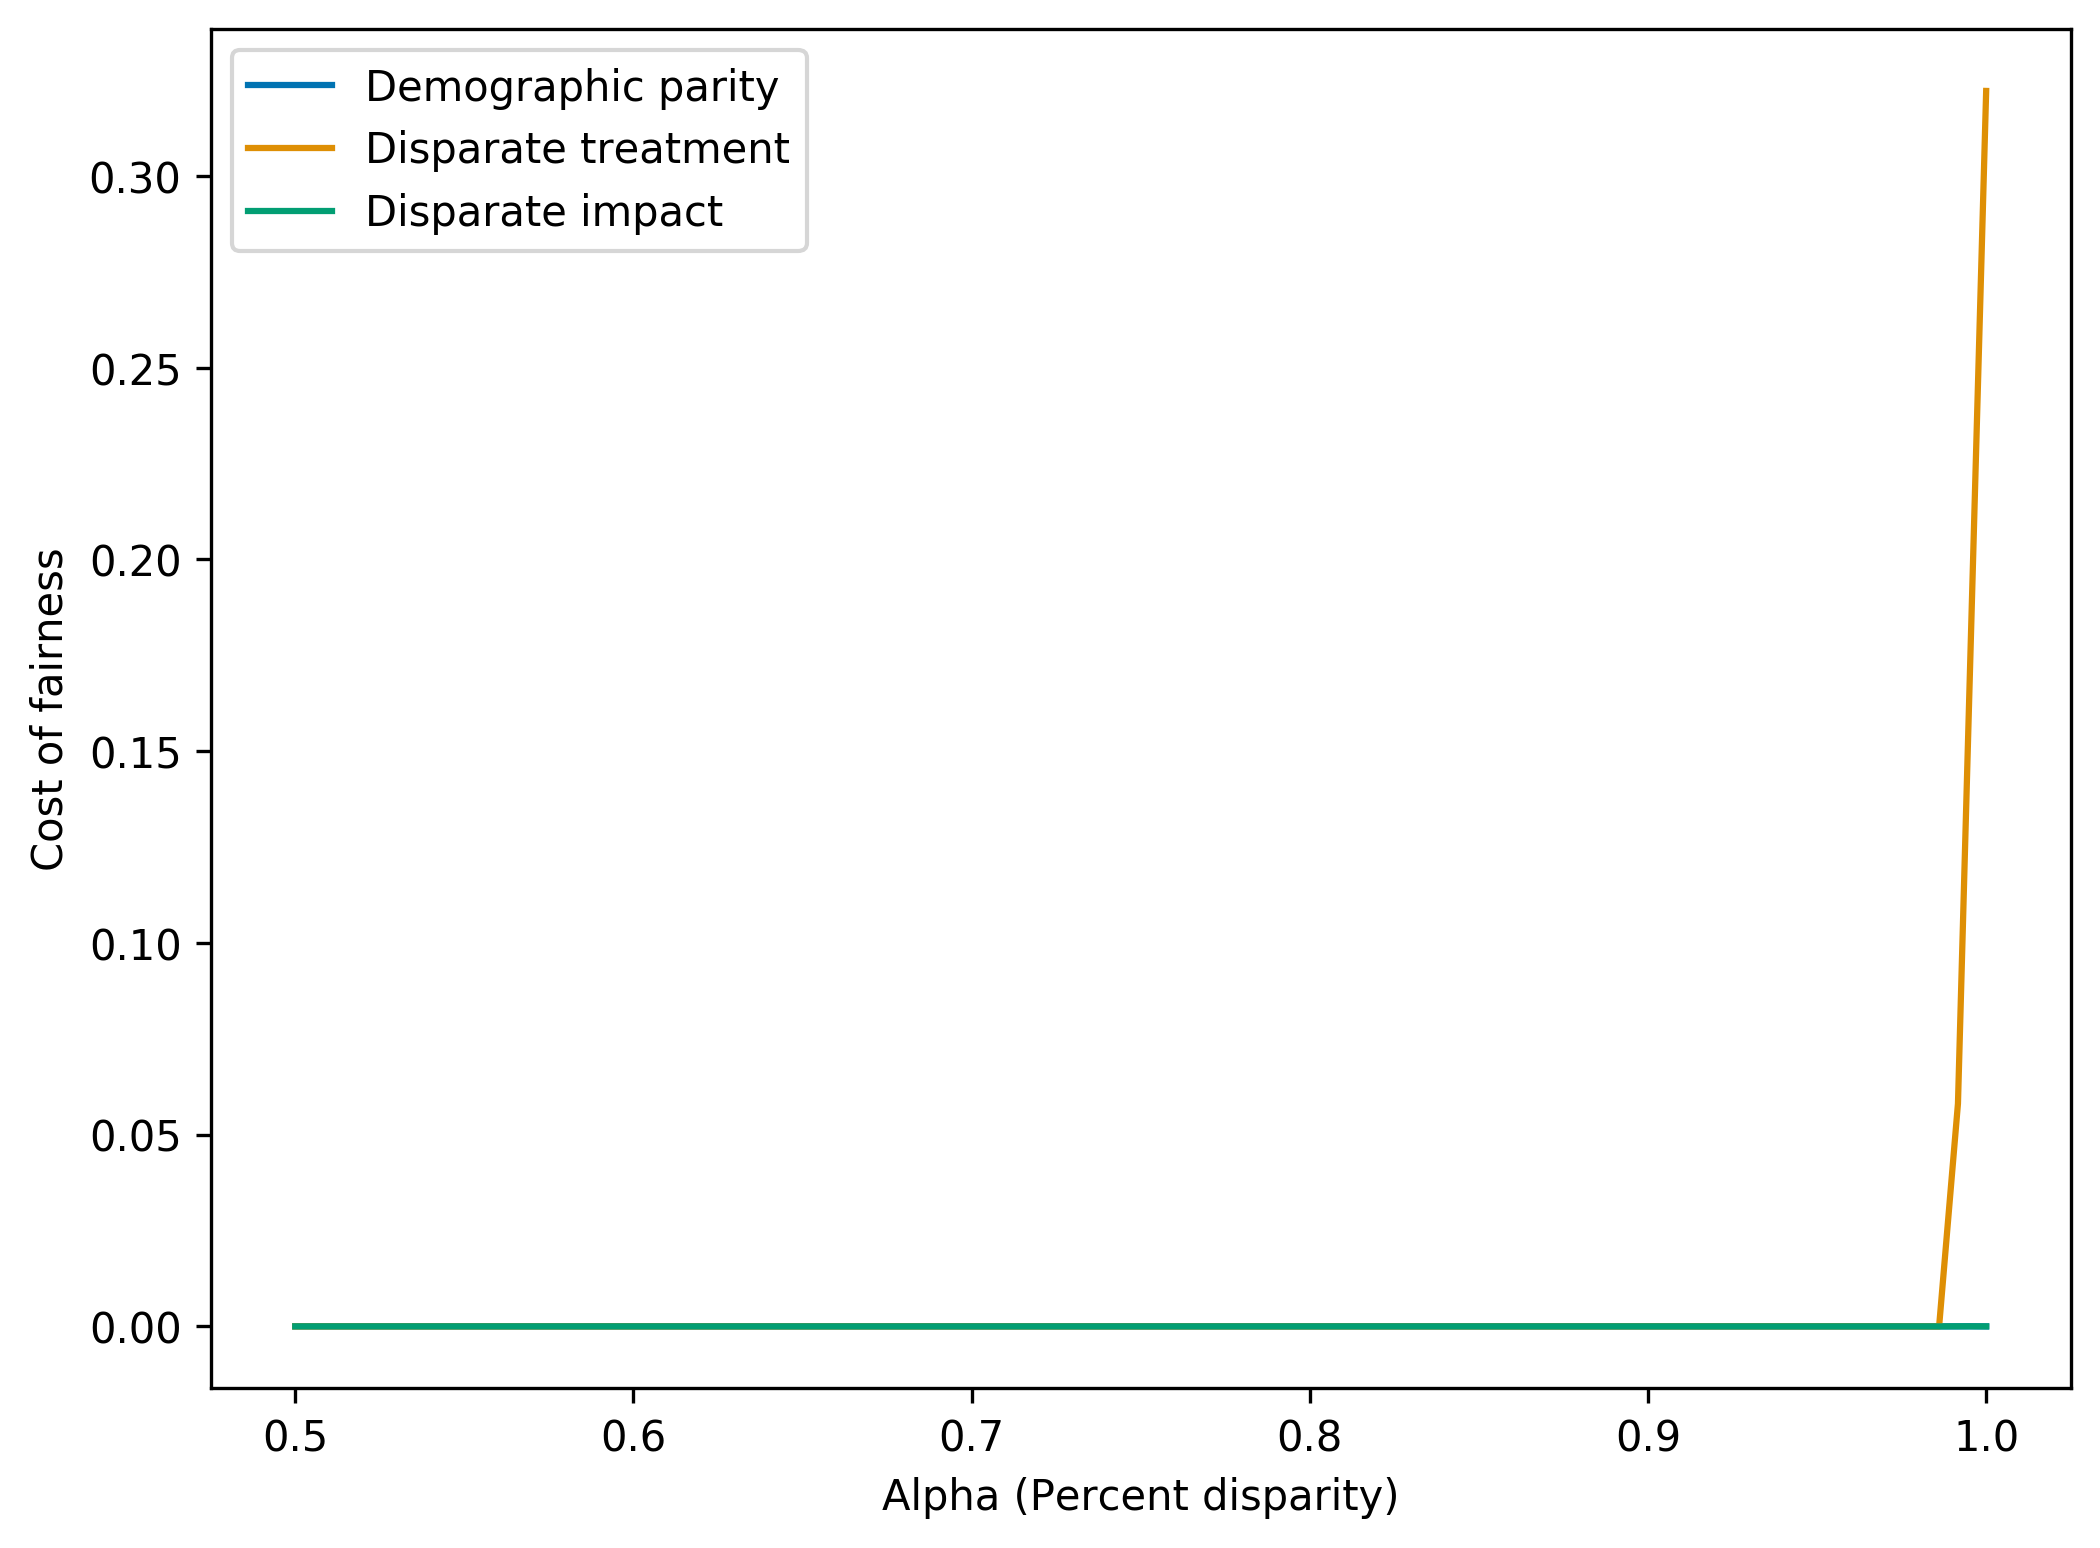

In [56]:
plt.figure(num=None, figsize=(8, 6), dpi=300)
plot(H, D[:,0], label="Demographic parity")
plot(H, D[:,1], label="Disparate treatment")
plot(H, D[:,2], label="Disparate impact")
plt.xlabel('Alpha (Percent disparity)')
plt.ylabel('Cost of fairness')
plt.legend()
plt.show()

In [38]:
D = np.vstack([C, [4.4356776060943377e-07, 0.3221887428423242, -2.997953390277757e-07]])
D

array([[ 1.66407723e-05, -6.18112347e-07,  6.70333811e-06],
       [ 2.27889382e-05, -4.81352595e-07, -4.26728330e-07],
       [ 1.28904662e-05, -3.72581811e-07,  8.46767731e-06],
       [ 6.93849624e-07,  5.89517130e-06,  6.83853375e-06],
       [ 7.07999108e-08,  1.55737480e-05,  1.03890420e-06],
       [ 5.18224587e-07,  1.51284179e-05,  8.50404602e-07],
       [ 7.46448065e-06, -6.98034394e-07, -2.41514098e-07],
       [ 1.16761819e-06,  1.40087827e-06, -3.71326467e-07],
       [-1.26310325e-07,  5.80859099e-02,  2.32519506e-05],
       [ 2.22451061e-05,  1.64301866e-01,  1.94711484e-05],
       [ 4.43567761e-07,  3.22188743e-01, -2.99795339e-07]])

In [43]:
H = np.append(J, [1])
H

array([0.5       , 0.70025787, 0.82030932, 0.89227827, 0.93542252,
       0.96128682, 0.97679206, 0.9860872 , 0.9916595 , 0.995     ,
       1.        ])

In [52]:
Z = np.vstack([Y, [823.027467763, 822.7052794637256, 823.0274685063634]])

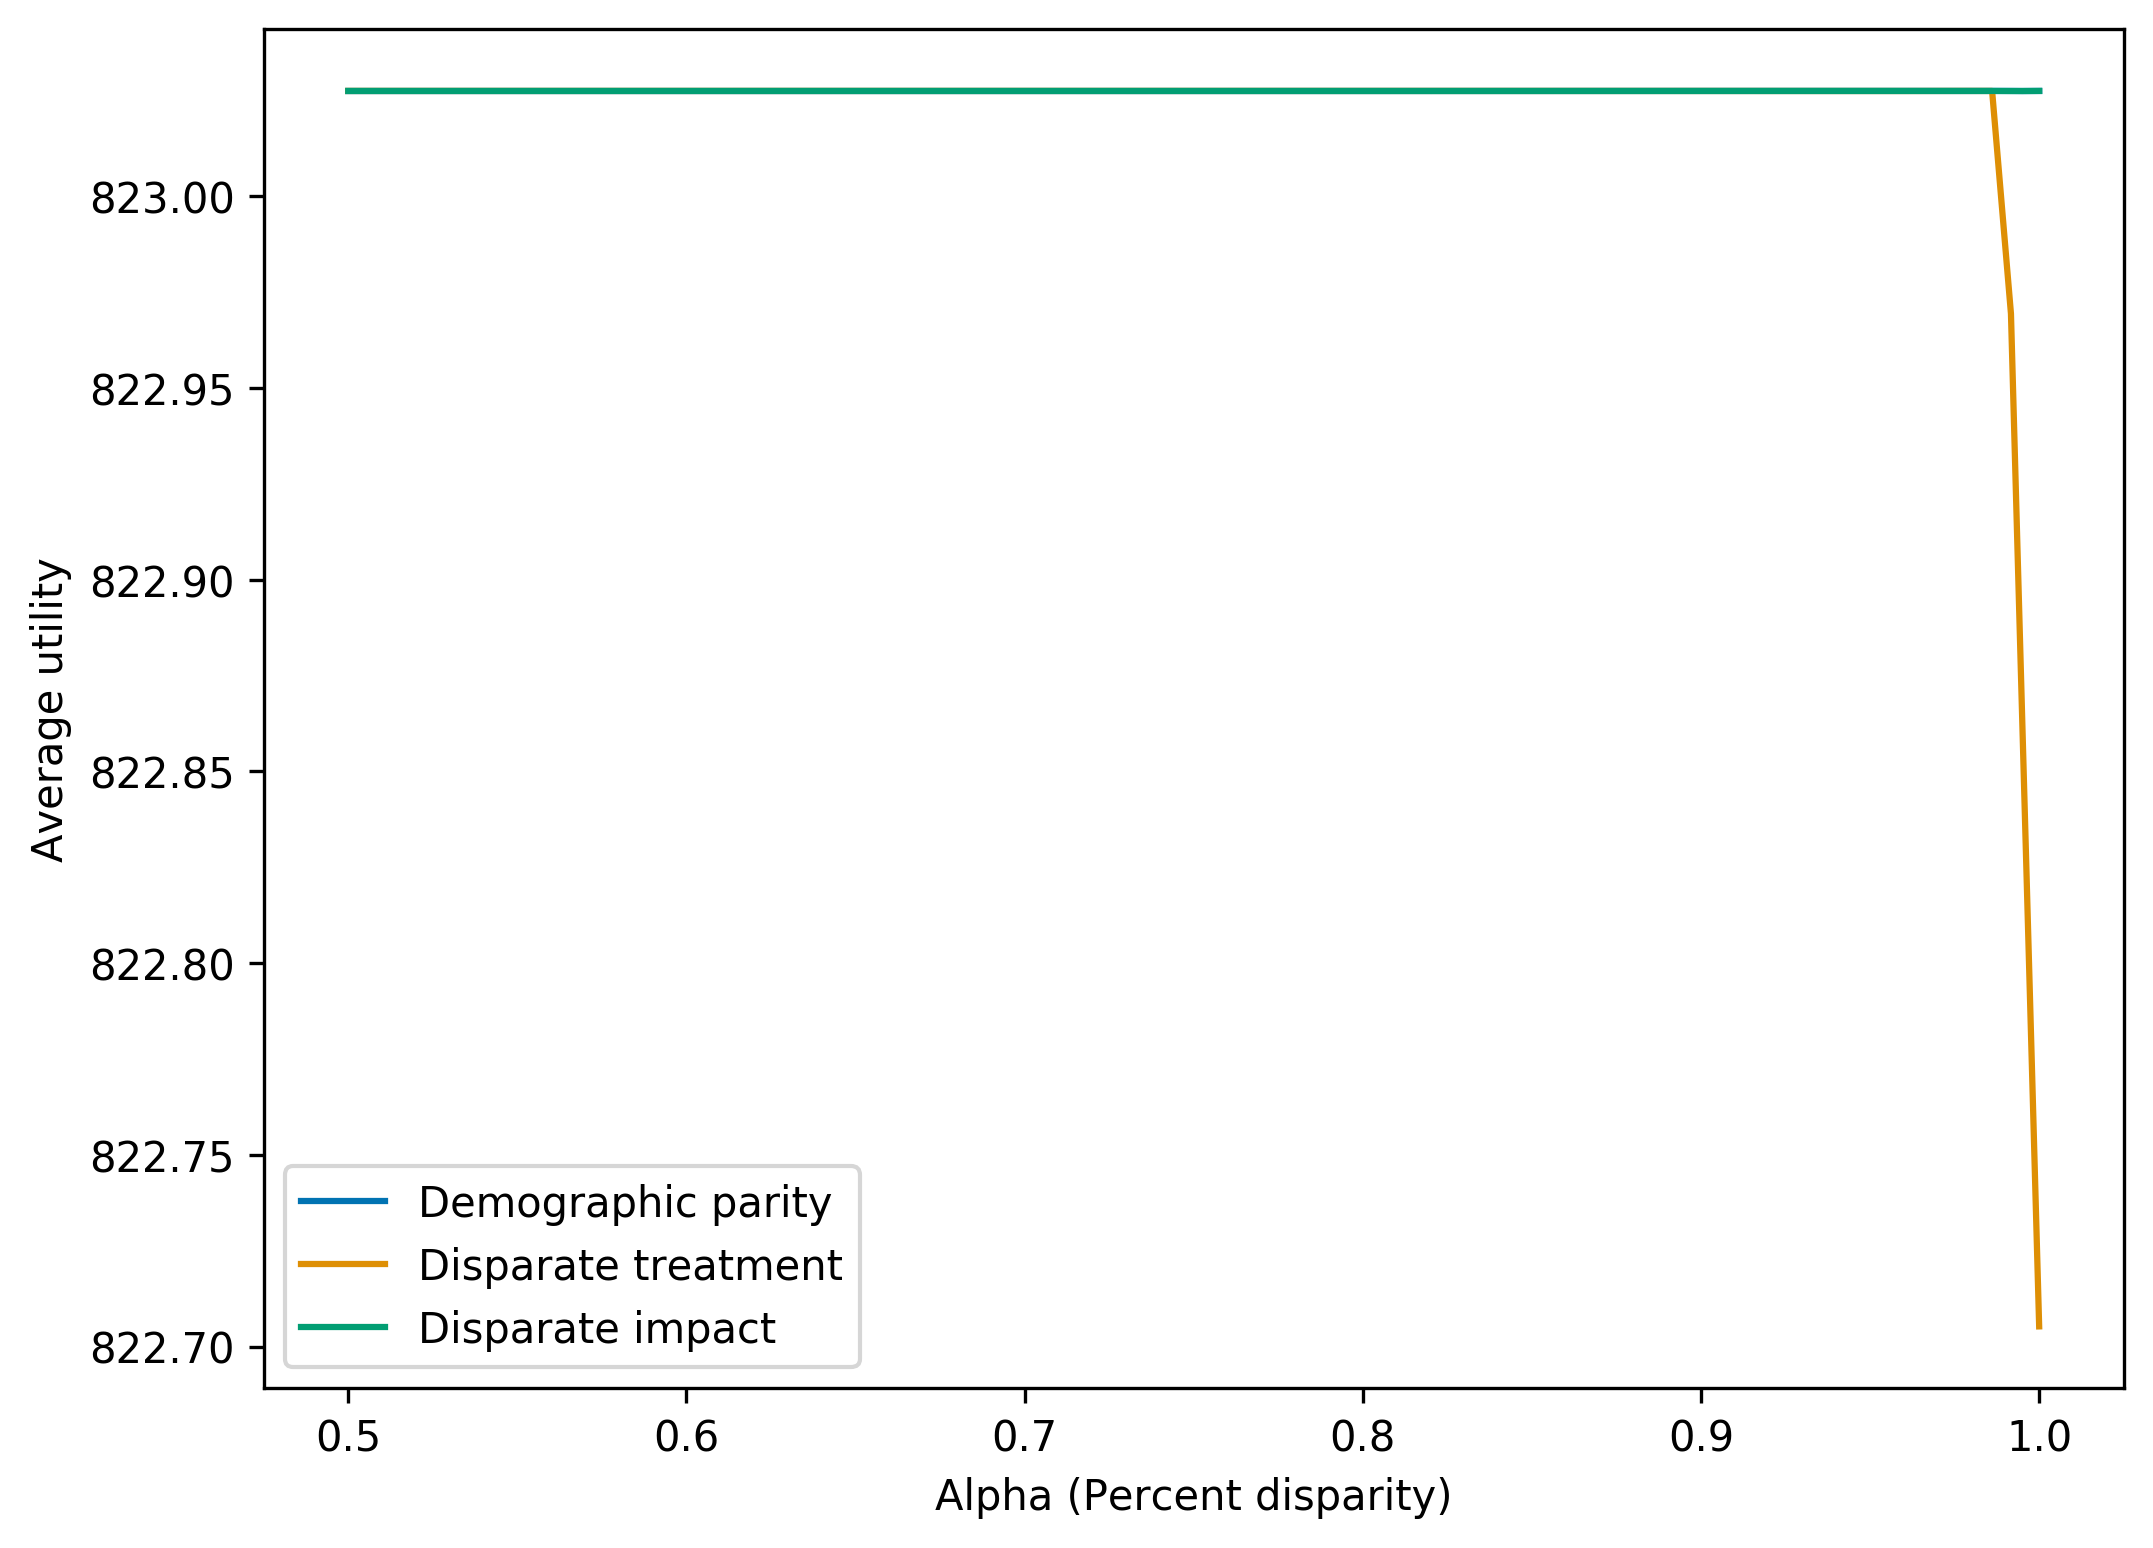

In [55]:
plt.figure(num=None, figsize=(8, 6), dpi=300)
plt.ticklabel_format(useOffset=False)
plot(H, Z[:,0], label="Demographic parity")
plot(H, Z[:,1], label="Disparate treatment")
plot(H, Z[:,2], label="Disparate impact")
plt.xlabel('Alpha (Percent disparity)')
plt.ylabel('Average utility')
plt.legend()
plt.show()

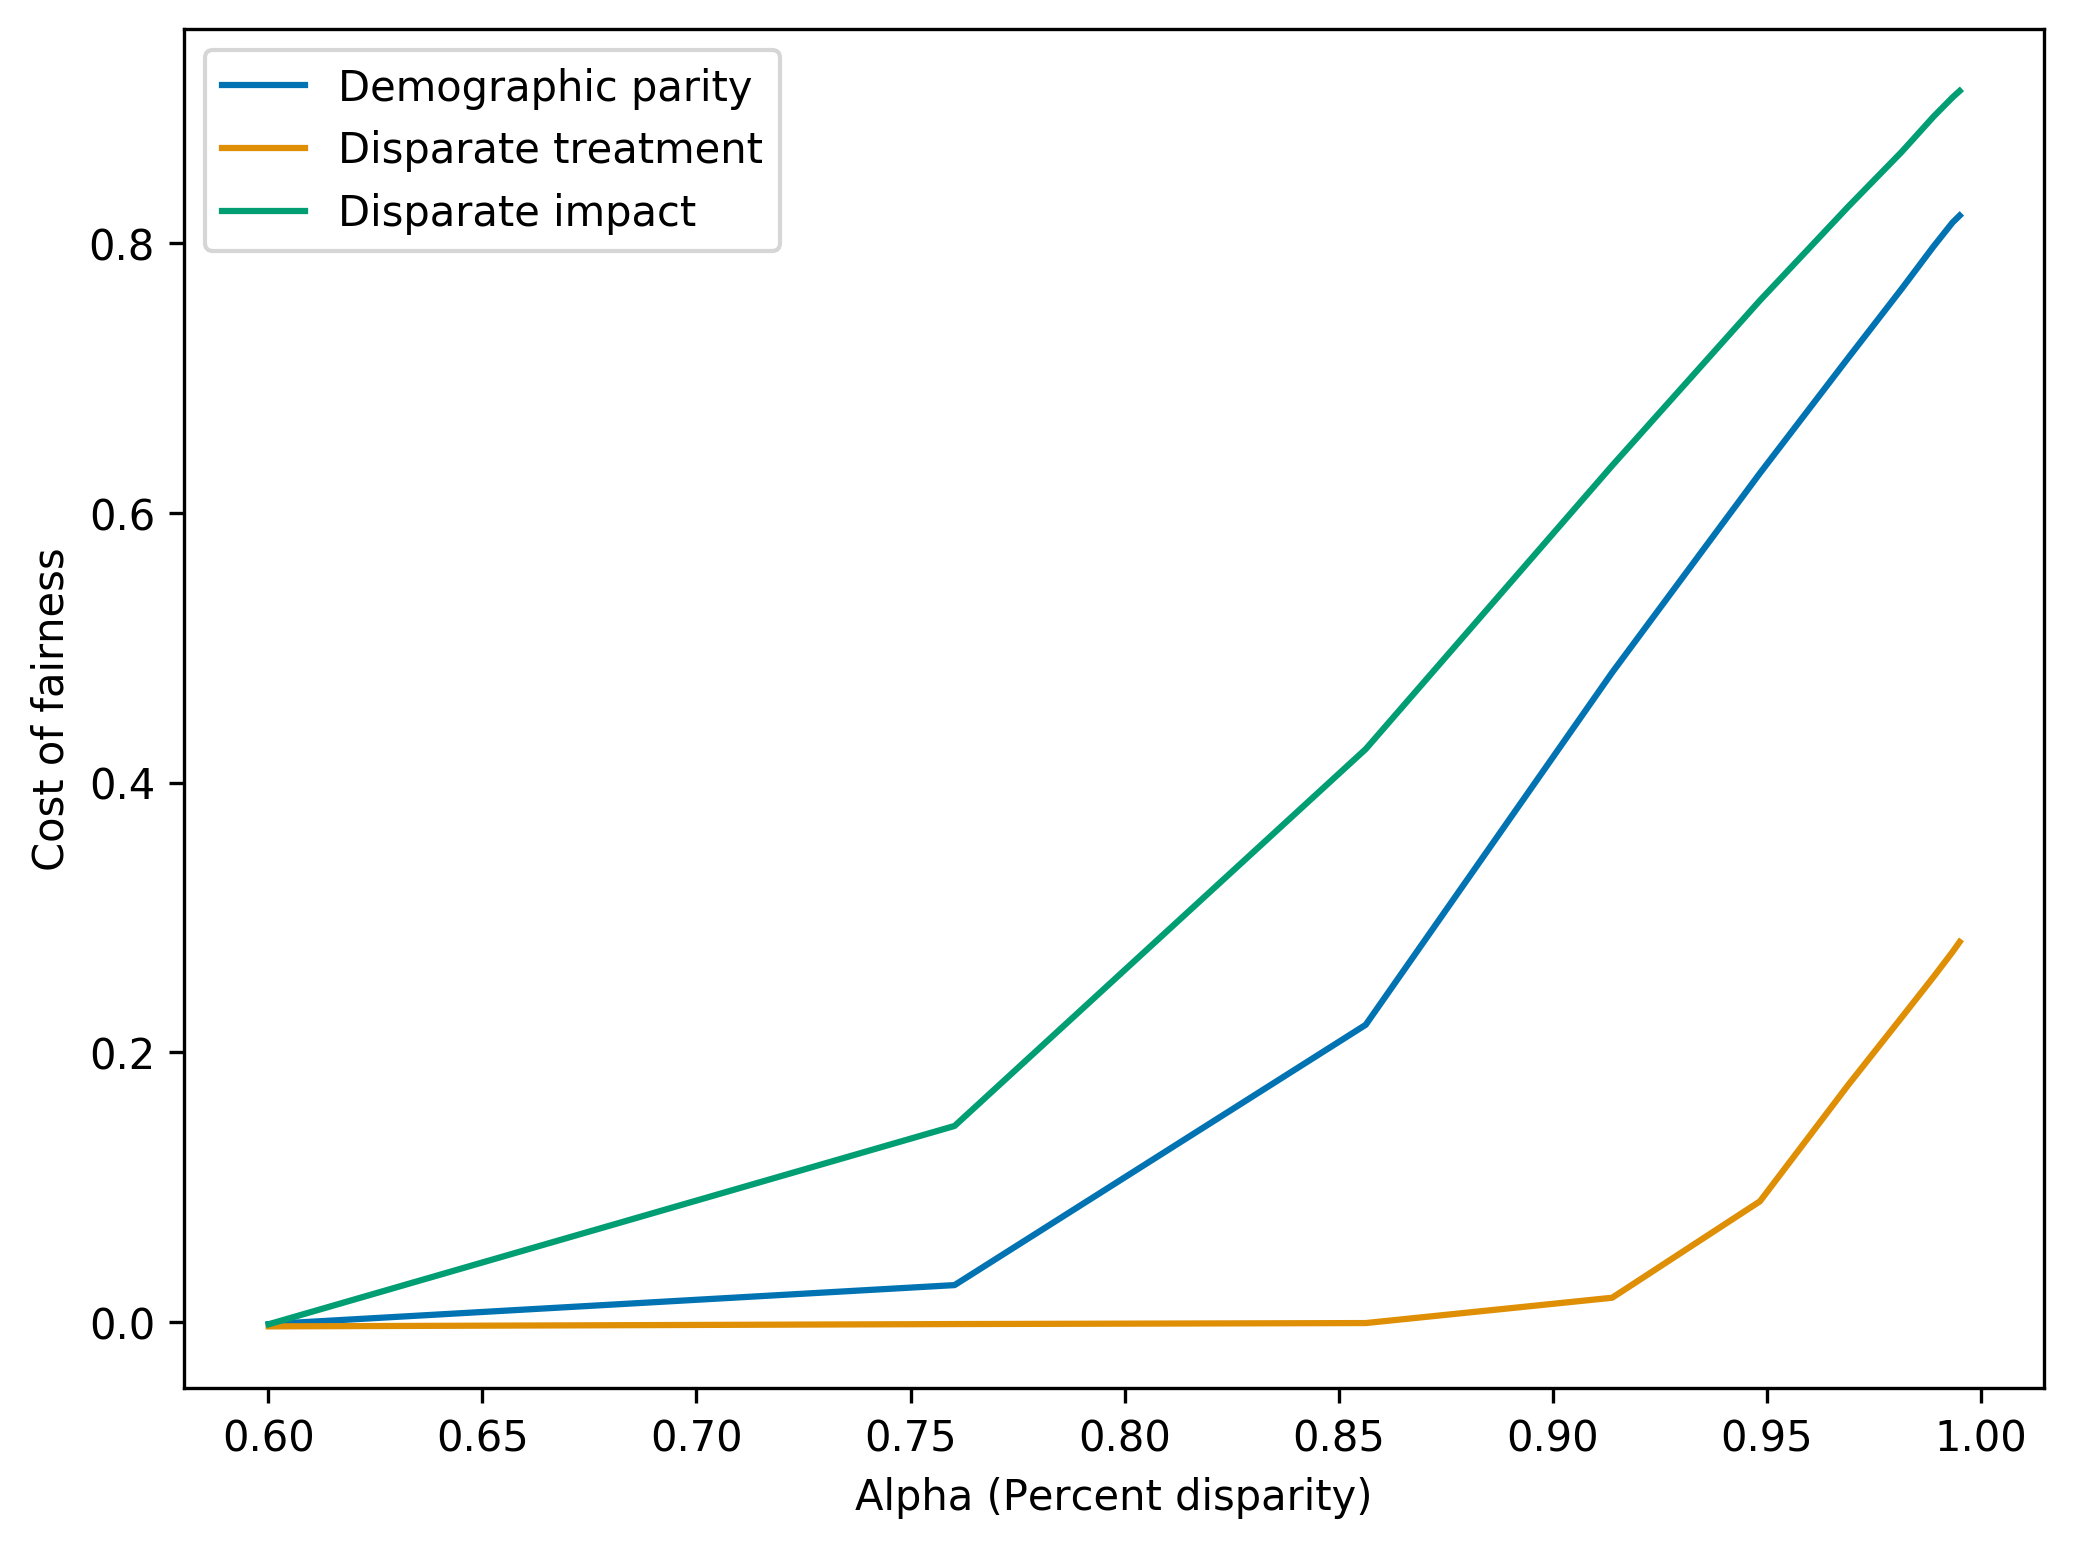

In [176]:
I = (J[0:len(J)-1] + J[1:len(J)])/2
I = np.append(I, J[len(J)-1])
K = (C[0:len(C)-1,:] + C[1:len(C),:])/2
K = np.vstack([K, C[len(C)-1,:]])
plt.figure(num=None, figsize=(8, 6), dpi=300)
plot(I, K[:,0], label="Demographic parity")
plot(I, K[:,1], label="Disparate treatment")
plot(I, K[:,2], label="Disparate impact")
plt.xlabel('Alpha (Percent disparity)')
plt.ylabel('Cost of fairness')
plt.legend()
plt.show()

In [60]:
I

array([0.55381001, 0.64984795, 0.72521469, 0.78435949, 0.83077396,
       0.86719818, 0.89578245, 0.91821424, 0.93581781, 0.94963238,
       0.96047351, 0.96898119, 0.97565768, 0.98089712, 0.98500883,
       0.98823553, 0.99076771, 0.99275487, 0.99431431, 0.995     ])

In [61]:
K

array([ 6.62106741e-02, -2.30780650e-03,  1.59982445e-01, -4.30159605e-02,
       -1.88256958e-02, -2.85436798e-03, -7.14722547e-02,  3.50084031e-02,
       -8.35455583e-03, -3.67981808e-03,  9.46911653e-02,  8.86574063e-02,
        4.13052827e-02,  2.73388023e-02, -1.97461790e-02,  9.21806533e-02,
        3.72399947e-03, -8.23458295e-02,  1.83119609e-02,  1.11440750e-01,
        2.00919107e-02, -9.66682424e-02,  1.71692632e-01,  7.60981656e-02,
       -5.94995488e-02,  5.68557510e-02,  4.04708468e-02,  5.79810647e-02,
       -1.92839406e-03, -5.23337664e-02, -1.84491174e-02,  3.37030514e-02,
        1.03783184e-04, -9.84720271e-03,  2.31204069e-02,  1.42148184e-01,
        1.06530009e-01,  3.36854220e-02,  5.20342291e-02,  5.60156270e-02,
       -4.61458829e-02, -6.70728083e-02,  1.86370477e-02, -1.28144305e-01,
        3.96376230e-02, -2.27317135e-03, -1.11799964e-02,  1.17233526e-01,
       -7.82286946e-03,  3.65250973e-02,  5.58365851e-02, -9.48543184e-03,
        3.36813149e-02, -

In [62]:
C[len(C)-1,:]

array([-0.0168267 ,  0.08055237,  0.03859404])

In [128]:
import importlib

In [28]:
import fairrecs.solver as slv
import fairrecs.dp_solver as dpslv
import fairrecs.dt_solver as dtslv
import fairrecs.di_solver as dislv

In [165]:
importlib.reload(slv)
importlib.reload(dpslv)
importlib.reload(dtslv)
importlib.reload(dislv)

<module 'fairrecs.di_solver' from '/Users/creator/Projects/CS6241/fairrecs/di_solver.py'>